#  Band Pass Filter

[View this notebook at nbviewer](https://nbviewer.jupyter.org/github/saty101/Speech-Enhancement/blob/main/notebooks/Bandpass_Butterworth.ipynb)

In [54]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn')
import IPython.display as ipd
from scipy.fft import fft
from librosa.display import specshow
import librosa

Let's visualize the time domain, frequency domain and time-frequency for one sample and mark the important parts. The vertical and horizontal lines show in what time and frequency the reader's words were detected.

In [56]:
X, fsamp = sf.read("../input/libri-dataset-train-100/LibriSpeech/train-clean-100/1034/121119/1034-121119-0000.flac")
X.shape, fsamp

((126000,), 16000)

2021-04-02 07:26:38,610 - WARNING - No handles with labels found to put in legend.


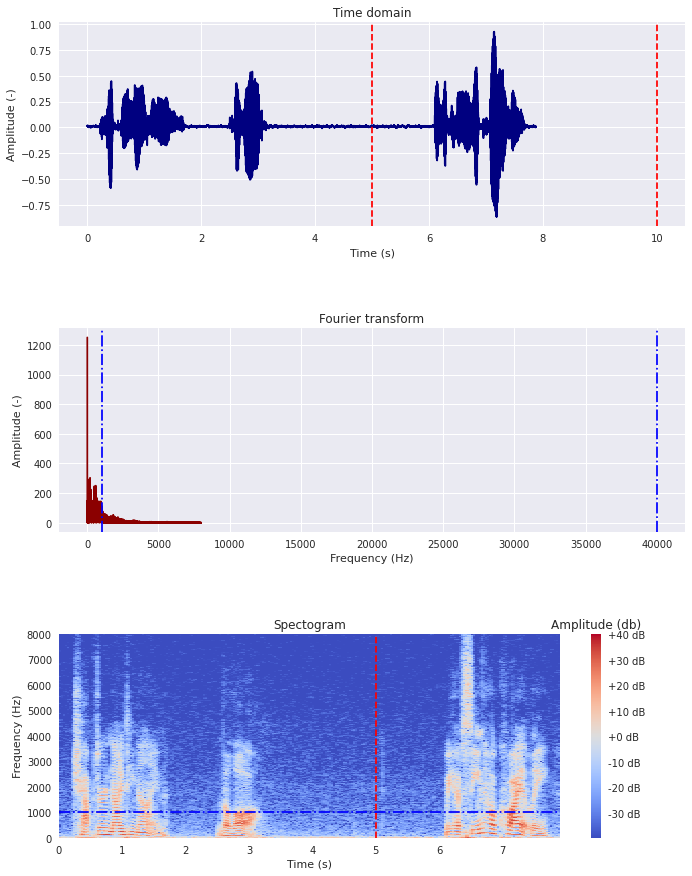

In [62]:
N = X.shape[0]
t = np.linspace(0, len(X), len(X))/fsamp
X_u = abs(fft(X))
X_u = X_u[:int(N/2)]
f_u = np.arange(0,N,1)*fsamp/N
f_u = f_u[:int(N/2)]
Xstft = librosa.stft(X)
Xstft_db = librosa.amplitude_to_db(abs(Xstft))
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,15), nrows=3, ncols=1)

# tmin = int(np.floor(example['t_min'].values))
# tmax = int(np.ceil(example['t_max'].values))
# fmin = int(np.floor(example['f_min'].values))
# fmax = int(np.ceil(example['f_max'].values))

t_min = 5.0
t_max = 10.0
f_min = 1000
f_max = 40000

ax1.plot(t,X,'navy')
ax1.axvline(x=t_min,c='r', linestyle='--')
ax1.axvline(x=t_max,c='r', linestyle='--')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (-)')
ax1.set(title='Time domain')

ax2.plot(f_u, X_u,'darkred')
ax2.axvline(x=f_min,c='b', linestyle='-.')
ax2.axvline(x=f_max,c='b', linestyle='-.')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude (-)')
ax2.set(title='Fourier transform')
ax2.legend()

img = specshow(Xstft_db, sr=fsamp, x_axis='time', y_axis='linear')
ax3.axvline(x=t_min, c='r', linestyle='--')
ax3.axvline(x=t_max, c='r', linestyle='--')
ax3.axhline(y=f_min, c='b', linestyle='-.')
ax3.axhline(y=f_max, c='b', linestyle='-.')
clb = fig.colorbar(img, ax=ax3, format="%+2.f dB")
clb.ax.set_title('Amplitude (db)')
ax3.set(title='Spectogram')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('Time (s)')
plt.subplots_adjust(hspace=0.5)
plt.show()


In [63]:
ipd.Audio(X, rate=fsamp)

## Band-pass Butterworth filter

In [64]:
from scipy.signal import butter,lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [73]:
# Applying the filter
X_filt = butter_bandpass_filter(X, f_min, f_max, 81000, order=9)

2021-04-02 07:38:13,268 - WARNING - No handles with labels found to put in legend.


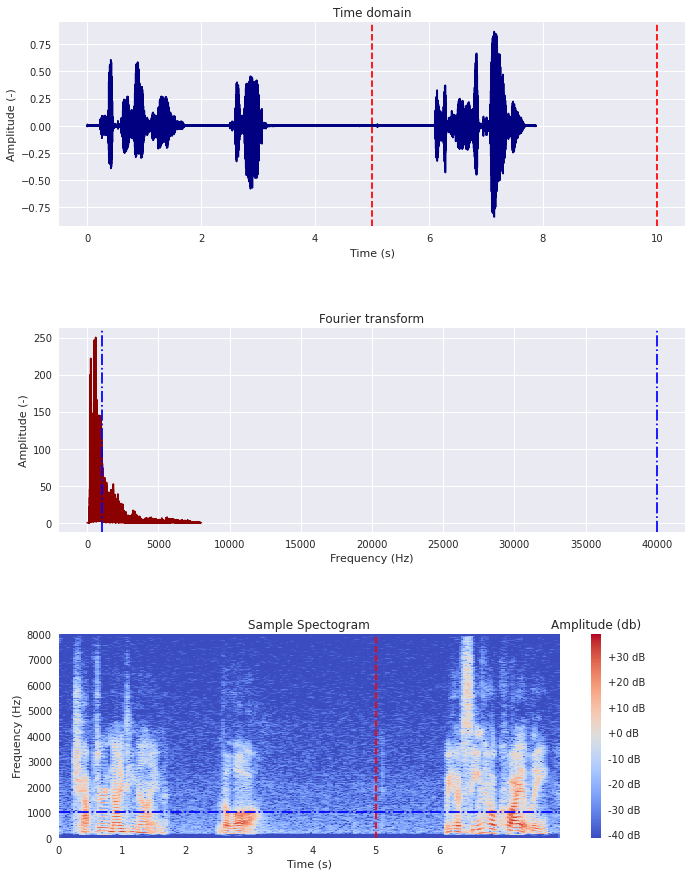

In [75]:
X_filt_u = abs(fft(X_filt))[:int(N/2)]

Xstft_filt = librosa.stft(X_filt)
Xstft_db_filt = librosa.amplitude_to_db(abs(Xstft_filt))

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,15),nrows=3, ncols=1)
ax1.plot(t,X_filt,'navy')
ax1.axvline(x=t_min,c='r', linestyle='--')
ax1.axvline(x=t_max,c='r', linestyle='--')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude (-)')
ax1.set(title='Time domain')

ax2.plot(f_u, X_filt_u,'darkred')
ax2.axvline(x=f_min,c='b', linestyle='-.')
ax2.axvline(x=f_max,c='b', linestyle='-.')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude (-)')
ax2.set(title='Fourier transform')
ax2.legend()

img = specshow(Xstft_db_filt, sr=fsamp, x_axis='time', y_axis='linear')
ax3.axvline(x=t_min,c='r', linestyle='--')
ax3.axvline(x=t_max,c='r', linestyle='--')
ax3.axhline(y=f_min,c='b', linestyle='-.')
ax3.axhline(y=f_max,c='b', linestyle='-.')
clb = fig.colorbar(img, ax=ax3, format="%+2.f dB")
clb.ax.set_title('Amplitude (db)')
ax3.set(title='Sample Spectogram')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_xlabel('Time (s)')
plt.subplots_adjust(hspace=0.5)
plt.show()

## Clipped audio (filtered)

In [78]:
ipd.Audio(X_filt, rate=fsamp)